<a href="https://colab.research.google.com/github/JackSD/Data-Science-Work/blob/master/study_of_volatilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test of various measures of normalized volatility for various Time series

Goal is to capture volatility in a time series of portfolio values. 

1) set up the testing data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np



In [29]:
#proving CV is dimensionless 

list_of_time_series = []

#normal - joiner
list_of_time_series.append([100,100,100,100,100,105,105,105,110,111,111,111,111,111])
multiplied_list = [element * 10 for element in list_of_time_series[0]]
list_of_time_series.append(multiplied_list)

#normal - leaver
list_of_time_series.append([100,100,100,100,100,100,100,100,110,111,111,111,111,0])
multiplied_list = [element * 10 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)

#normal - volatile
list_of_time_series.append([100,110,120,130,120,110,100,90,90,80,100,111,111,120])
list_of_time_series.append(multiplied_list)

#1 transaction in and out
list_of_time_series.append([100,0,0,0,0,0,0,0,0,0,0,0,0,0])
list_of_time_series.append([100,0,0,0,0,0,0,0,0,0,0,0,0,100])
#many transactions in and out
list_of_time_series.append([500,0,0,0,0,500,0,0,0,0,500,0,0,0])

#many transactions in and out, on base of capital 
multiplied_list = [element + 1000 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)

#high freq transactions in and out, on a base of capital 
list_of_time_series.append([500,0,500,0,500,0,500,0,500,0,500,0,500,0])
multiplied_list = [element + 1000 for element in list_of_time_series[len(list_of_time_series)-1]]
list_of_time_series.append(multiplied_list)




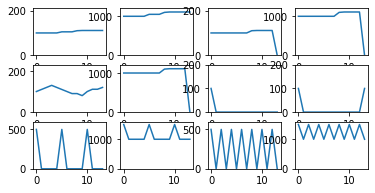

<Figure size 2160x2160 with 0 Axes>

In [30]:
#show the time series graphically:
for i in range(len(list_of_time_series)):
    plt.subplot(4, 4, i+1)
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.plot(list_of_time_series[i])
    # Show/save figure as desired.

plt.figure(figsize=(30, 30))
plt.show()


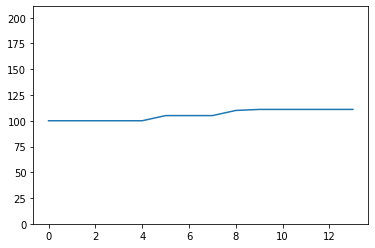

mean=105.71
sd=4.98
coeff_variation=0.05
average daily capital change=0.01


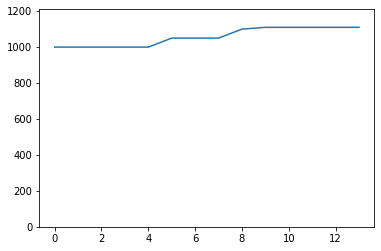

mean=1057.14
sd=49.83
coeff_variation=0.05
average daily capital change=0.01


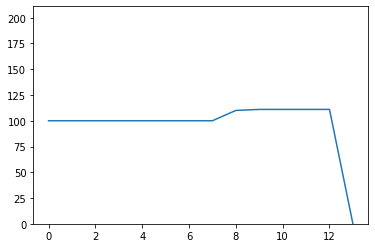

mean=96.71
sd=28.33
coeff_variation=0.29
average daily capital change=0.09


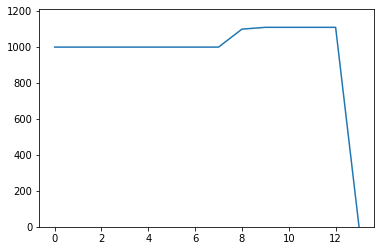

mean=967.14
sd=283.29
coeff_variation=0.29
average daily capital change=0.09


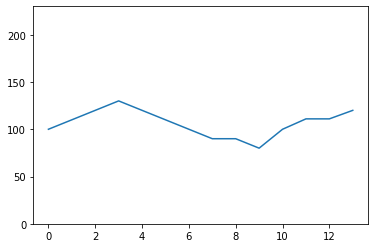

mean=106.57
sd=13.97
coeff_variation=0.13
average daily capital change=0.09


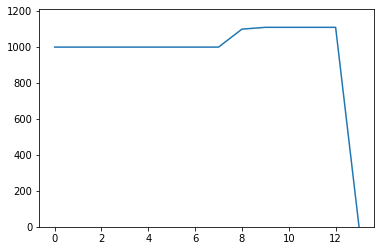

mean=967.14
sd=283.29
coeff_variation=0.29
average daily capital change=0.09


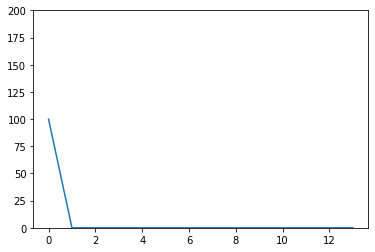

mean=7.14
sd=26.73
coeff_variation=3.74
average daily capital change=1.0


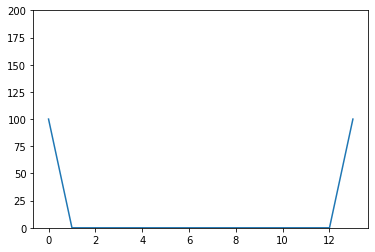

mean=14.29
sd=36.31
coeff_variation=2.54
average daily capital change=1.0


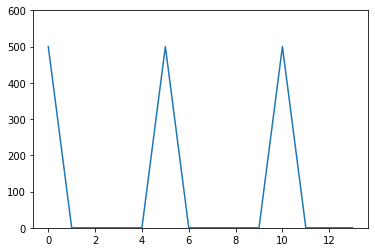

mean=107.14
sd=212.91
coeff_variation=1.99
average daily capital change=1.0


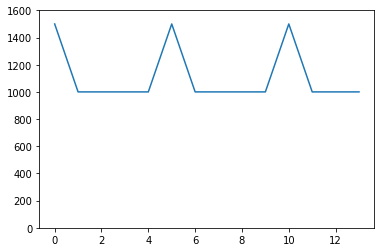

mean=1107.14
sd=212.91
coeff_variation=0.19
average daily capital change=0.15


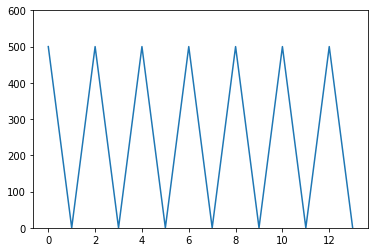

mean=250
sd=259.44
coeff_variation=1.04
average daily capital change=1.0


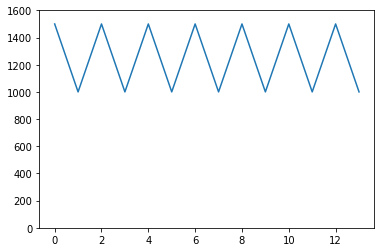

mean=1250
sd=259.44
coeff_variation=0.21
average daily capital change=0.41


In [32]:
#show the co-efficient of variation (sd/mean)
list_of_time_series_percent_change=[]
for i in range(len(list_of_time_series)):
    plt.plot(list_of_time_series[i])
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.show()
    print('mean=' + str(round(stats.mean(list_of_time_series[i]),2)) )
    print('sd=' + str(round(stats.stdev(list_of_time_series[i]),2)) )
    print('coeff_variation=' + str(round(stats.stdev(list_of_time_series[i])/stats.mean(list_of_time_series[i]),2) ))

    percent_series = pd.Series(list_of_time_series[i])
    a = percent_series.pct_change()
    a = [1 if x==float("inf") else abs(x) for x in a]
    print('average daily capital change=' + str(round(np.nanmean(a),2) ))
    list_of_time_series_percent_change.append(a)
    # Show/save figure as desired.



the above coefficient of variation has 2 problems

1) it is less effective work when there is a base value (eg a base of capital)

2) it is lower with more volatility (ie many transactions in and out lowers the COF)